In [1]:
import mysql.connector
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [2]:
try:
    mydb = mysql.connector.connect(
    user="root", password="ece356-", host="127.0.0.1", database="c455li"
)
    query = """
    WITH studentGrade AS(
    WITH assessmentgrade AS (
        SELECT
            id_assessment,
            id_student,
            score
        FROM
            studentassessment
    )
    SELECT
        assessmentgrade.id_student as 'id_student',
        sum((weight / 100 * score)) / sum(weight) as 'grade'
    FROM
        assessmentgrade
        left JOIN assessments on assessmentgrade.id_assessment = assessments.id_assessment
    where
        weight is not null
        and score is not null
    GROUP BY
        assessmentgrade.id_student
),
studentUsage as (
    select
        id_student,
        sum(sum_click) as 'total_click'
    from
        studentvle
    group by
        id_student
)
select
    studentGrade.id_student as 'id_student',
    grade,
    total_click
FROM
    studentGrade
    INNER JOIN studentUsage ON studentGrade.id_student = studentUsage.id_student
where
    grade is not null
    and total_click is not null;
    """
    result_dataFrame = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [3]:
result_dataFrame

,id_student,grade,total_click
0,11391,0.793333,498.0
1,31604,0.733333,1027.0
2,38053,0.756667,1179.0
3,45642,0.720000,721.0
4,53025,0.756667,1615.0
...,...,...,...
16572,2602542,0.930000,2198.0
16573,2612102,0.880000,2212.0
16574,2641156,0.250000,829.0
16575,2649948,0.680000,1498.0


In [4]:
X = result_dataFrame['total_click'].values.reshape(-1, 1)
Y = result_dataFrame['grade'].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [5]:
print("Coefficients: \n", linear_regressor.coef_)

Coefficients: 
 [[3.81447933e-05]]


In [6]:
1/linear_regressor.coef_

array([[26215.89772037]])

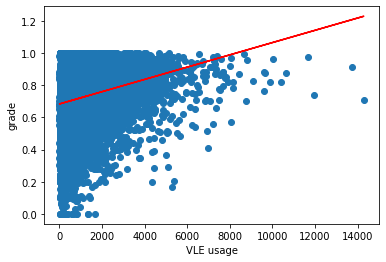

In [7]:
plt.scatter(X, Y)
plt.xlabel("VLE usage")
plt.ylabel("grade")
plt.plot(X, Y_pred, color='red')
plt.show()

In [10]:
result_dataFrame.to_csv('result.csv')